In [1]:
%%html
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value=" 
Curso: Diseño y mantenimiento de instalaciones de energía solar fotovoltaica
Alumno: Francisco Manuel Roman Gamez

"></form>

In [2]:
# pip install folium
# https://www.earthdatascience.org/tutorials/introduction-to-leaflet-animated-maps/

In [3]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd


In [39]:
#Define coordinates of where we want to center our map
boulder_coords = [40.015, -4.2705]

#Create the map

#Display the map

CU_Boulder_coords = [36.664207,-4.458674]
East_Campus_coords = [36.663928,-4.457435]
SEEC_coords = [36.664302,-4.456856]


#Adding a tileset to our map
map_with_tiles = folium.Map(location = boulder_coords, tiles = 'Stamen Toner',zoom_start = 6)
#Add markers to the map
folium.Marker(CU_Boulder_coords,    
    popup="jajja",
    icon=folium.Icon(icon='fa solar-panel', color="blue"),
    draggable=True
    ).add_to(map_with_tiles)

# folium.RegularPolygonMarker(CU_Boulder_coords, popup = 'CU Boulder', fill_color = '#00ff40',
#                             number_of_sides = 4, radius = 10).add_to(map_with_tiles)
# folium.RegularPolygonMarker(East_Campus_coords, popup = 'EastCampus', fill_color = '#bf00ff',
#                             number_of_sides = 5, radius = 10).add_to(map_with_tiles)
# folium.RegularPolygonMarker(SEEC_coords, popup = 'SEEC Building', fill_color = '#ff0000',
#                            number_of_sides = 8, radius = 10).add_to(map_with_tiles)

map_with_tiles


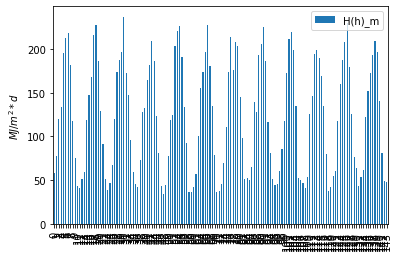

In [5]:
# ejemplo importar dtos de pvgis
import requests as requests
import pandas as pd 
import json

r = requests.get("https://re.jrc.ec.europa.eu/api/MRcalc?lat=45&lon=8&horirrad=1&outputformat=json")
data = r.json()

j=data["outputs"]["monthly"]
jf= json.dumps(j, indent=2)
df=pd.read_json(jf, orient='records') 
# df
# data
# df.dtypes
ax=df.plot(kind='bar',y=['H(h)_m']);ax.set_ylabel("$MJ / m^2 * d$");


Text(0.5, 1.0, 'Generador 80 kWp en Toledo Lat.:40, orient.:0, incl.:30')

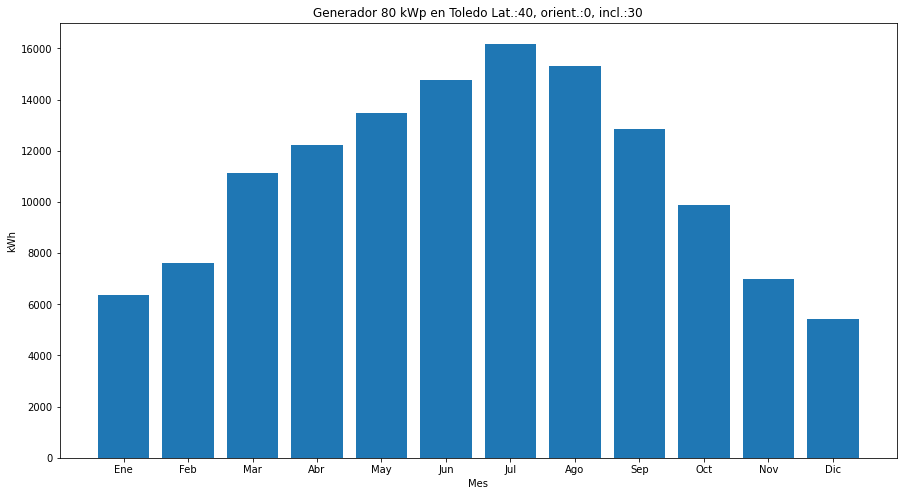

In [6]:
# /////////////////////////////////////////
proyecto='ua92-te2-07'
import pandas as pd
import numpy as np

# de los daltos del problema
pmp=80 
# pmp=1
ciudad='Toledo'
latitud=40
orientacion=0
inclinacion=30
incl_tabla_k=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
inclinacion_k=min(incl_tabla_k, key=lambda x:abs(x-inclinacion))
# ctes
pr=0.8 #performance ratio
gcem=1


s=pd.DataFrame()
s=pd.read_csv('tablas/cheq4.csv', index_col=0, header=0)
s=s[['dias','h',ciudad]]
s.rename(columns={ciudad:'H'}, inplace=True)


# 
k=pd.DataFrame()
k=pd.read_csv('tablas/k'+str(latitud)+'.csv', index_col=0, header=0)
k=k.T
ki=k[[inclinacion_k]]
# anadir la k 
s=s.join(ki)
s.rename(columns={inclinacion_k:'k'}, inplace=True)
# 
s['Gdm_0']=round(s.H/3.6,2)
s['Gdm_I']=round(s.H*s.k/3.6,2)
s['PR']=0.8
s['Ep']=round(s.Gdm_I*pmp*s.PR/gcem,2) 
s['Epm']=s.dias*s.Ep
s=s[['Gdm_0','Gdm_I','PR','Ep','Epm']]
s.rename(columns={'Gdm_0':'$G_{dm}$','Gdm_I':'$G_{dmI}$'}, inplace=True)

y=s[['Epm']].values
ee=np.cumsum(y)
ea=round(ee[len(y)-1],2)
# ea
x=s.index
y=y.flatten()
# //////////////////////////////////////////////////


from bokeh.io import output_file, show
from bokeh.models import FactorRange
from bokeh.plotting import figure

        # bokeh
fig2 = figure()
xx = [1, 2, 3, 4, 5,7]
y1 = [2, 6, 4, 3, 5,55]
fig2.varea(x = x,y1 = y1)
show(fig2)
# ///////////////////////////////////////////////////////////////////




import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,8))

ax.bar(x, y)
ax.set_ylabel('kWh')
ax.set_xlabel('Mes')
ax.set_title('Generador '+str(pmp)+' kWp'+' en '+ciudad+' Lat.:'+str(latitud)+', orient.:'+str(orientacion)+', incl.:'+str(inclinacion))
# fig.savefig('figs/'+proyecto+'plt.png')
# plt.close()


**7.- Calcula la energía producida por un generador fotovoltaico de 80 Kwp instalados en la ciudad de Toledo con los módulos fotovoltaicos instalados con inclinación de 30º respecto a la horizontal y orientados a sur.**

__RESPUESTA:__

# Cálculo de la producción anual esperada

Se utiliza  metodo del IDAE del apartado 7 del Pliego de Condiciones
Técnicas de Instalaciones Conectadas a Red, Cálculo de la producción anual esperada.

- En  la  Memoria  se  incluirán  las  producciones  mensuales  máximas  teóricas  en  función  de  la  irradiancia, la potencia instalada y el rendimiento de la instalación.

- Los datos de entrada que deberá aportar el instalador son los siguientes: 

    - $G_{dm}(0)$. Valor  medio  mensual  y  anual  de  la  irradiación  diaria  sobre  superficie  horizontal,  en  $kWh/(m^2 \cdot día)$, obtenido a partir de alguna de las siguientes fuentes: 
    
        - Agencia Estatal de Meteorología. 
        - Organismo autonómico oficial. 
        - Otras fuentes de datos de reconocida solvencia, o las expresamente señaladas por el IDAE. 

    - $G_{dm}(\alpha , \beta  )$. Valor  medio  mensual  y  anual  de  la  irradiación  diaria  sobre  el  plano  del  generador  en  $kWh/(m^2 \cdot día)$, obtenido a partir del anterior, y en el que se hayan descontado las pérdidas por sombreado en caso de ser éstas superiores a un 10 % anual . El parámetro $\alpha$ representa el azimut y $\beta$ la inclinación del generador.
    $$
    G_{dm}(\alpha , \beta  )=G_{dm}(0) \cdot k  \label{eq1}
    $$
    - Rendimiento energético de la instalación o “performance ratio”, PR. Eficiencia de la instalación en condiciones reales de trabajo, que tiene en cuenta: 
        - La dependencia de la eficiencia con la temperatura. 
        -  La eficiencia del cableado. 
        -  Las pérdidas por dispersión de parámetros y suciedad. 
        -  Las pérdidas por errores en el seguimiento del punto de máxima potencia. 
        -  La eficiencia energética del inversor. 
        -  Otros.

    - La estimación de la energía inyectada se realizará de acuerdo con la siguiente ecuación: 
 
 $$
 E_p=\frac { G_{dm}(\alpha, \beta) \cdot P_{mp} \cdot PR}{G_{CEM}} \label{eq2}
 $$
 
         - Donde:
         
$P_{mp}$= Potencia pico del generador

$G_{CEM}=1 kW/m^2$

__para el proyecto,__ 

y los valores de la instalacion:
* $P_{mp}$= {{pmp}} KW ; Potencia pico del generador fotovoltaico  
* $G_{CEM}$ =  1 kW/m^2; Irradiancia en Condiciones Estándar de Medida
* $PR$=0.8 ; Performance ratio (PR) estimado constante a lo largo del año.
* $ G_{dm}=G_{dm}(0)$ en $kWh/m^2 \cdot dia$;  Se obienen los datos con el programa CHEQ4 para {{ciudad}}
* $k$; coeficiente que es función de la inclinación {{inclinacion}} de los captadores y la latitud de {{latitud}}$^o$, mas cercanos cotenidos en las tablas del PCT de instalaciones de baja temperatura del IDAE
* $ G_{dmI}=G_{dm}(\alpha, \beta) $ en $kWh/m^2 \cdot dia$;  Se obtiene aplicando la formula $(\ref{eq1})$
* $E_p $ en $kWh/dia$;  Se obtiene aplicando la formula $(\ref{eq2})$
* $E_{pm} = E_p \cdot dias_{mes}$ en $kWh$; Estimación de energía mensual inyectada  


>$E_{anual}=${{ea}} kWh

Se genera la tabla con los valores medios diarios y mensuales .
{{s}}


![alt text](figs/ua92-te2-07plt.png "Title")

In [7]:
%%html
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value=" 
Curso: Diseño y mantenimiento de instalaciones de energía solar fotovoltaica
Alumno: Francisco Manuel Roman Gamez

"></form>